In [1]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\kalls\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# 1.1  Movielens full - EDA

In [70]:
movies = "C:/Users/kalls/Documents/GitHub/Maskininl-rning-Lukas-K-llstr-m/data-MovieLens-full/movies.csv"
ratings = "C:/Users/kalls/Documents/GitHub/Maskininl-rning-Lukas-K-llstr-m/data-MovieLens-full/ratings.csv"

df_movies = pd.read_csv(movies, usecols=['movieId','title', 'genres'], dtype={'movieId':'int32','title':'str', 'genres':'str'})
ratings = pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

FileNotFoundError: [Errno 2] No such file or directory: '\\data-MovieLens-full\\movies.csv'

In [3]:
df = pd.merge(df_movies, ratings, on='movieId')

## 1.1 10 most rated movies

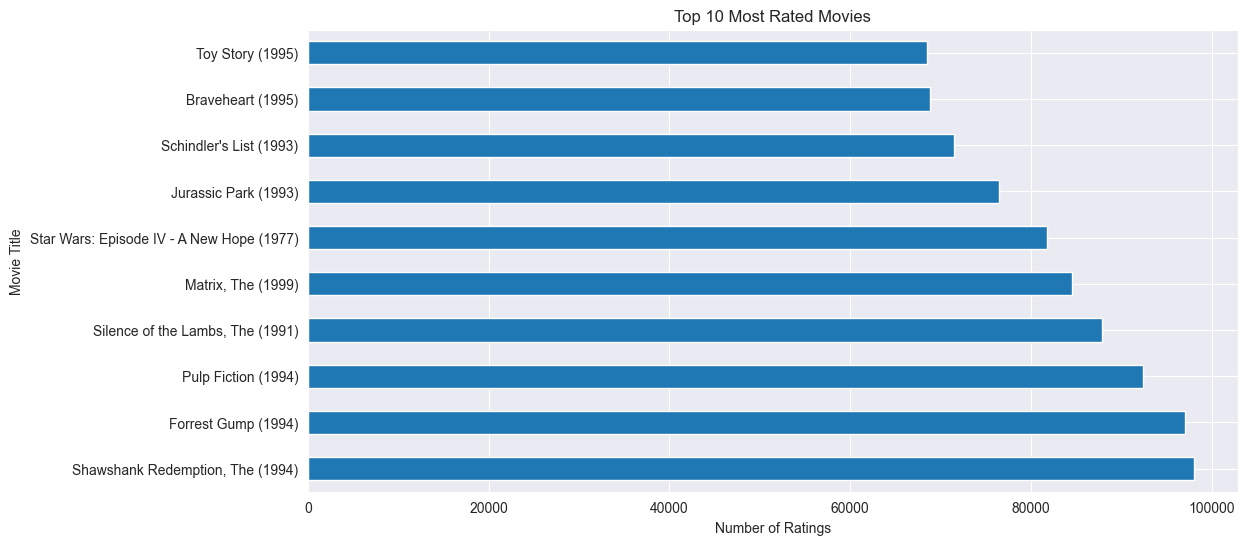

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
df['title'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

## 1.1 Avarage rating for the 10 most rated movies

In [65]:
print("\033[4mTop 10 Most rated movies\033[0m")
print('{:40} {:6} {:20}'.format('Movie name:', 'Average rating:', 'Number of ratings:'))

for i in df.groupby('title')['rating'].count().sort_values(ascending=False).head(10).index:
   print('{:45} {:1.2f} {:20}'.format(i, df[df['title'] == i]['rating'].mean(), df[df['title'] == i]['rating'].count()))

Top 10 Most rated movies
Movie name:                              Average rating: Number of ratings:  
Shawshank Redemption, The                     4.42                97999
Forrest Gump                                  4.06                97040
Pulp Fiction                                  4.17                92406
Silence of the Lambs, The                     4.15                87899
Matrix, The                                   4.15                84545
Star Wars: Episode IV - A New Hope            4.12                81815
Jurassic Park                                 3.67                76451
Schindler's List                              4.26                71516
Braveheart                                    4.01                68803
Toy Story                                     3.89                68469


## 1.1 How often every rating occurs

In [6]:
df['year'] = df['title'].str.extract('(\(\d\d\d\d\))',expand=False)
df['year'] = df['year'].str.extract('(\d\d\d\d)',expand=False)  # Extracting the year from the title
df['title'] = df['title'].str.replace('(\(\d\d\d\d\))', '') # Removing the year from the title
df['title'] = df['title'].apply(lambda x: x.strip()) # Removing the trailing spaces

C:\Users\kalls\AppData\Local\Temp\ipykernel_14124\1970239173.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('(\(\d\d\d\d\))', '')


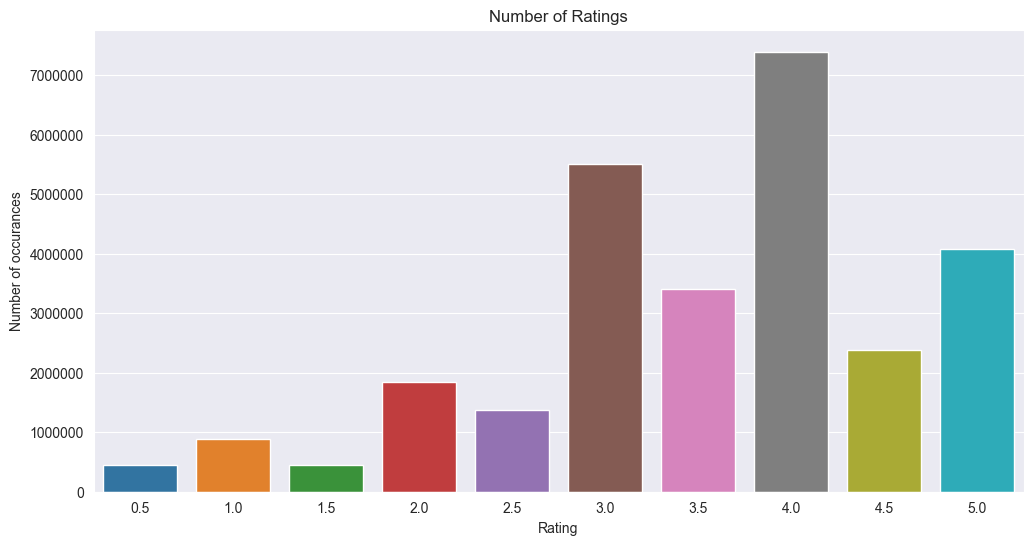

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of occurances')
plt.show()

# 1.1 The number of movies represented each year

In [8]:
df["number_of_ratings"] = df.groupby("title")["rating"].transform("count")
df["ratings_per_year"] = df.groupby("year")["rating"].transform("count")

In [9]:
df_year = df[['year','title']].drop_duplicates().groupby('year').count().reset_index()

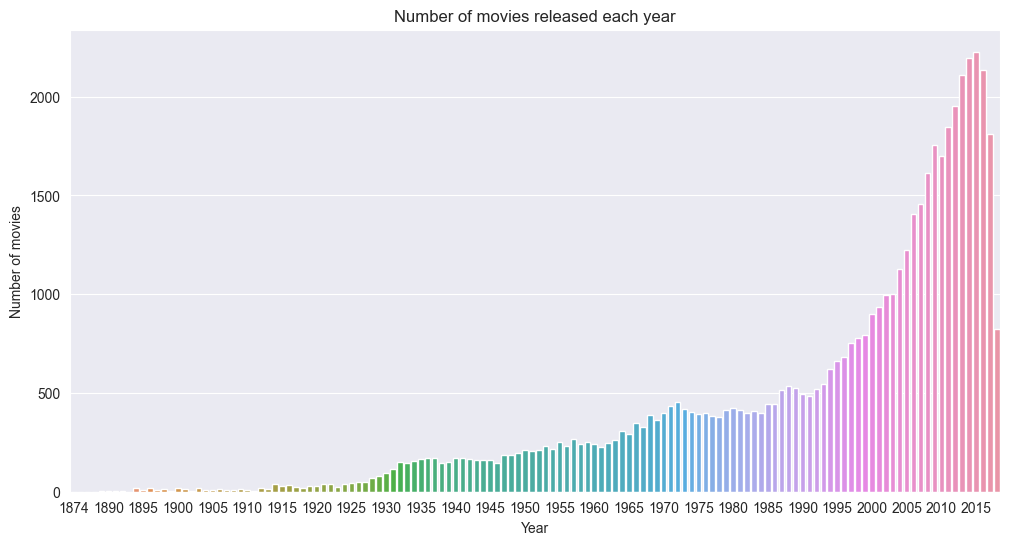

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='title', data=df_year)
plt.xticks(np.arange(0, len(df_year['year']), 5))
plt.title('Number of movies released each year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


In [11]:
df_movie = df[['title','movieId','number_of_ratings']].drop_duplicates().sort_values(by='number_of_ratings', ascending=False)
df_movie.reset_index(drop=True, inplace=True)

df_movie2 = df[['title','movieId','number_of_ratings']].drop_duplicates()
df_movie2 = df_movie2.sort_values(by='number_of_ratings', ascending=False)
df_movie2.reset_index(drop=True, inplace=True)

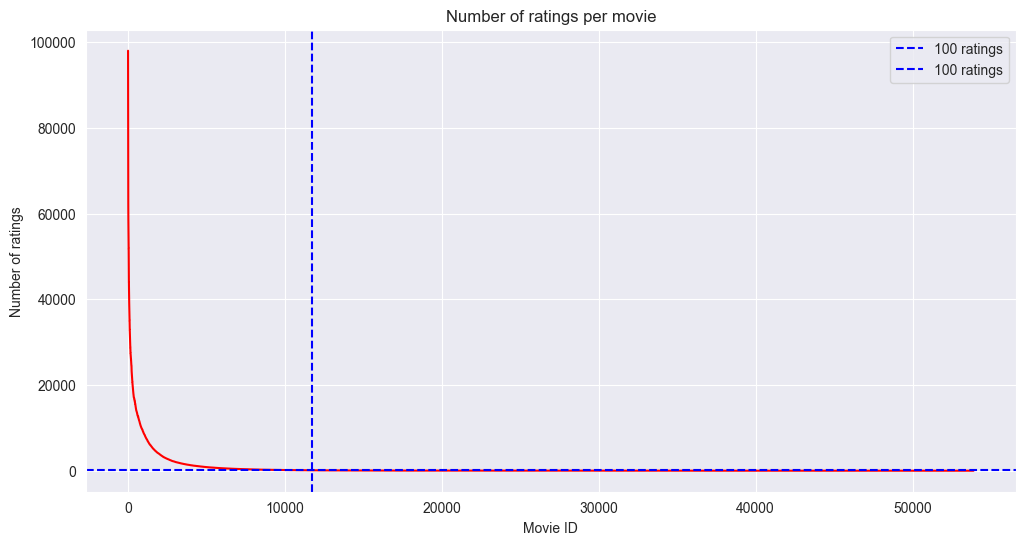

In [13]:
plt.figure(figsize=(12,6))

sns.lineplot(x=df_movie2.index, y="number_of_ratings", data=df_movie2, color='red')
plt.axhline(y=100, color='blue', linestyle='--', label='100 ratings')
plt.axvline(x=df_movie2[df_movie2['number_of_ratings'] == 100].index[0], color='blue', linestyle='--', label='100 ratings')

plt.title('Number of ratings per movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of ratings')
plt.legend()
plt.show()


In [15]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns

ratings_path = "C:/Users/kalls/Documents/GitHub/Maskininl-rning-Lukas-K-llstr-m/data-MovieLens-full/ratings.csv"
new_df_ratings = pd.read_csv(ratings_path, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

movies_path = "C:/Users/kalls/Documents/GitHub/Maskininl-rning-Lukas-K-llstr-m/data-MovieLens-full/movies.csv"
new_df_movies = pd.read_csv(movies_path, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

all_movies = pd.read_csv(movies_path, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

## Filter the data

In [16]:
new_df_ratings['avarage_rating'] = new_df_ratings['rating'].round(2) # Creating a new column with the avarage rating rounded to 2 decimals for each movie

In [17]:
new_df_ratings['number_of_ratings'] = new_df_ratings.groupby('movieId')['rating'].transform('count') # creating a new column with the number of ratings for each movie

new_df_ratings = new_df_ratings[new_df_ratings['number_of_ratings'] > 100] # Revome all movies with less than 100 ratings

new_df_ratings = new_df_ratings.drop_duplicates() # remove all duplicates

new_df_ratings = new_df_ratings.drop('number_of_ratings', axis=1) # Removing the number of ratings column

In [18]:
new_df_ratings = new_df_ratings.groupby('userId').filter(lambda x: len(x) >= 50) # Removing users who have rated less than 50 movies 

df_user = new_df_ratings[['userId','rating']].groupby('userId').count().reset_index() # Creating a new dataframe with every user and how many ratings they have

### Number of ratings per user, sorted by number of ratings

<AxesSubplot: ylabel='rating'>

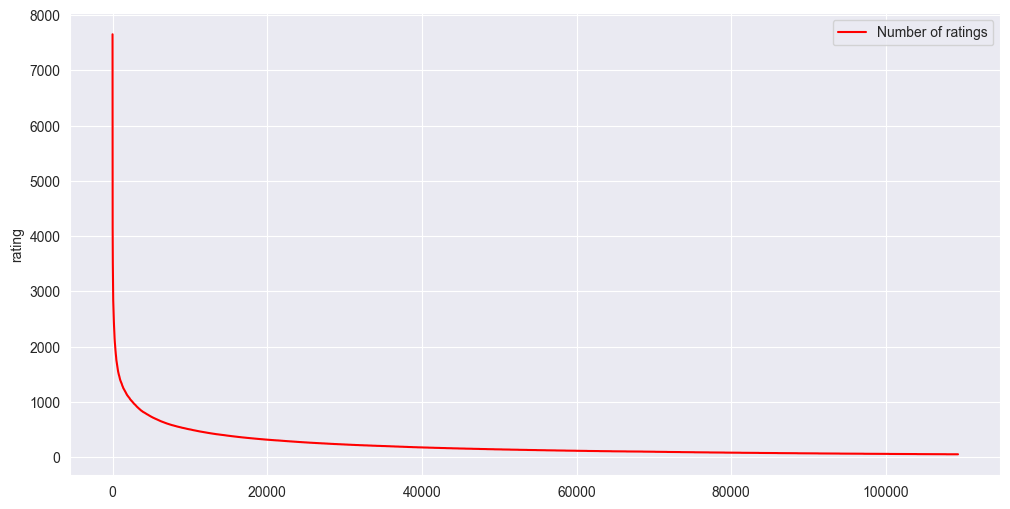

In [19]:
df_user = df_user.sort_values(by='rating', ascending=False)
df_user.reset_index(inplace=True, drop=True)

plt.figure(figsize=(12,6))
sns.lineplot(x=df_user.index, y="rating", data=df_user, color='red', label='Number of ratings')

In [20]:
# remove all movies that are not in the ratings file from the movies file
new_df_movies = new_df_movies[new_df_movies['movieId'].isin(new_df_ratings['movieId'])]

print(f"Number of unique movies: {new_df_ratings['movieId'].nunique()}")
print(f"Number of unique Users: {new_df_ratings['userId'].nunique()}")

new_df_ratings.drop('avarage_rating', axis=1, inplace=True)

Number of unique movies: 10448
Number of unique Users: 109318


# 1.2 Skapa gles matris

In [21]:
new_movies_users=new_df_ratings.pivot(index='movieId', columns='userId',values='rating').fillna(0)
new_mat_movies_users=csr_matrix(new_movies_users.values)

In [22]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(new_mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [40]:
def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data) # Fitting the model to the given data
    idx=process.extractOne(movie_name, new_df_movies['title'])[2] # Getting the index of the movie that matches the name
    print('Movie Selected: ',new_df_movies['title'][idx], 'Index: ',idx) # Printing the name and index of the movie that was given as input
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations+1) # Getting the distances and indices of the closest movies using kneighbors
    indices_and_distance = list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())) # Creating a list with tuples of the index and distance
    indices_and_distance.sort(key=lambda x: x[1], reverse=False) # Sorting the list by the distance, so the closest movies are first
    indices_and_distance = indices_and_distance[1:] # Removing the first index and distance, since it is the movie itself
    for i in indices_and_distance: # Print every movie and the distance of the movie
        print('{:55} {:1.4f}'.format(new_df_movies.iloc[i[0]].title, i[1]))
        

recommender("Toy Story", new_mat_movies_users, model_knn,5)

Movie Selected:  Toy Story (1995) Index:  0
Searching for recommendations.....
Forrest Gump (1994)                                     0.3759
Toy Story 2 (1999)                                      0.3792
Star Wars: Episode IV - A New Hope (1977)               0.3800
Jurassic Park (1993)                                    0.3844
Back to the Future (1985)                               0.3869


### Detta rekomenderings systemet är ett kollaborativt filtrerings system som rekommenderar filmer baserat på vad människor som gillat liknande filmer också har tyckt om. Det fungerar genom att skapa en user-item (användare/film i detta falet) matris och genom den matrisen identifera mönster i vad människor tycker om eller inte tycker om.
### Andra rekommenderings system är bl.a content-based filtrering och kunskaps-baserad recommenderings system. Content-baserade rekommenderings system fungerar genom att man analyserar attribut av föremålen (filmerna) såsom genre, skådespelare eller regissörer av filmerna och rekommenderar då filmer med liknande innehåll som filmen/filmerna som användaren tycker om, eller rekommenderar inte filmer som använderar ogillar.
### Kunskapsbaserade rekommenderings system är baserade på att användaren får frågar om vad hen gillar eller inte gillar och baserat på dessa svar rekommenderas filmer. 
- https://sv.wikipedia.org/wiki/Kollaborativ_filtrering
- https://developers.google.com/machine-learning/recommendation/content-based/basics
- https://medium.com/@jwu2/knowledge-based-recommender-systems-an-overview-536b63721dba